In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data = data.dropna()

<AxesSubplot:xlabel='Class', ylabel='count'>

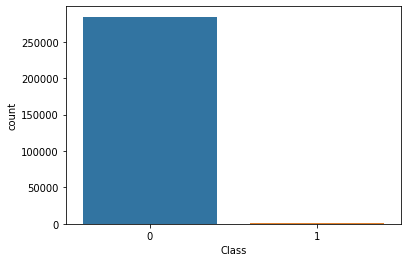

In [6]:
sns.countplot(x=data['Class'])

In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

# Normalization the Data

In [8]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
X_new = transformer.fit_transform(X)

In [9]:
X_new

array([[ 0.00000000e+00, -9.08530061e-03, -4.86273988e-04, ...,
         8.92345665e-04, -1.40662094e-04,  9.99658439e-01],
       [ 0.00000000e+00,  3.14200001e-01,  7.01632379e-02, ...,
        -2.36814441e-03,  3.88161797e-03,  7.09143734e-01],
       [ 2.64054194e-03, -3.58679087e-03, -3.53875680e-03, ...,
        -1.46161374e-04, -1.57777241e-04,  9.99867610e-01],
       ...,
       [ 9.99999922e-01,  1.11093644e-05, -1.74348810e-06, ...,
         2.57817197e-08, -1.53719162e-07,  3.92851325e-04],
       [ 9.99999998e-01, -1.39153210e-06,  3.07013515e-06, ...,
         6.29793357e-07,  6.04977321e-07,  5.78743893e-05],
       [ 9.99999211e-01, -3.08701850e-06, -1.09804382e-06, ...,
        -1.39781176e-08,  7.89903674e-08,  1.25584419e-03]])

# Full Feature

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state = 42) # keeping 15% for test 

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import geometric_mean_score, specificity_score
from sklearn import metrics

In [71]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
gmean = []
spec = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    gmean.append(round(e, 3))
    spec.append(round(f, 3))

# ELM

In [12]:
def split_data(X, y, test_size, random_state=None):
    
    np.random.seed(seed=random_state) # set random seed

    indices = np.arange(X.shape[0]) # arange the indices
    np.random.shuffle(indices) # shuffle the indices
    
    X = X[indices] # assign the shuffled X
    y = y[indices] # assign the shuffled y

    n_test = int(test_size * X.shape[0]) # calculate the number of test samples
    
    return X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:] # return the train and test data

In [13]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) # mean of the elements that are equal

In [14]:
def confusion_matrix(y_true, y_pred):

    n_classes = len(np.unique(y_true)) # Number of classes

    cm = np.zeros((n_classes, n_classes)) # initialize the confusion matrix
    
    for i in range(len(y_true)): # for each sample
        cm[y_true[i], y_pred[i]] += 1 # add 1 to the corresponding row and column
    
    return cm

In [15]:
def softmax(x):
    
    max = np.max(x, axis=1, keepdims=True) # Returns max of each row and keeps same dims
    e_x = np.exp(x - max) # Subtracts each row with its max value
    sum = np.sum(e_x, axis=1, keepdims=True) # Returns sum of each row and keeps same dims
    f_x = e_x / sum
    
    return f_x

In [16]:
class FeatureNormalization():
    
    def __init__(self):
        pass

    def fit(self, X, y=None):

        self.mu = np.mean(X, axis=0) # Mean of each feature
        self.sigma = np.std(X, axis=0) # Standard deviation of each feature

        return self

    def transform(self, X):

        X_transform = (X-self.mu)/self.sigma # Normalized data (zero mean and unite standard deviation)

        return X_transform

In [17]:
class ELMClassifier():

    def __init__(self, L, random_state=None):
        
        self.L = L # number of hidden neurons
        self.random_state = random_state # random state

    def fit(self, X, y=None):

        M = np.size(X, axis=0) # Number of examples
        N = np.size(X, axis=1) # Number of features

        np.random.seed(seed=self.random_state) # set random seed

        self.w1 = np.random.uniform(low=-1, high=1, size=(self.L, N+1)) # Weights with bias

        bias = np.ones(M).reshape(-1, 1) # Bias definition
        Xa = np.concatenate((bias, X), axis=1) # Input with bias

        S = Xa.dot(self.w1.T) # Weighted sum of hidden layer
        H = np.tanh(S) # Activation function f(x) = tanh(x), dimension M X L

        bias = np.ones(M).reshape(-1, 1) # Bias definition
        Ha = np.concatenate((bias, H), axis=1) # Activation function with bias

        # One-hot encoding
        n_classes = len(np.unique(y))
        y = np.eye(n_classes)[y]

        self.w2 = (np.linalg.pinv(Ha).dot(y)).T # w2' = pinv(Ha)*D

        return self

    def predict(self, X):

        M = np.size(X, axis=0) # Number of examples
        N = np.size(X, axis=1) # Number of features

        bias = np.ones(M).reshape(-1, 1) # Bias definition
        Xa = np.concatenate((bias, X), axis=1) # Input with bias

        S = Xa.dot(self.w1.T) # Weighted sum of hidden layer
        H = np.tanh(S) # Activation function f(x) = tanh(x), dimension M X L

        bias = np.ones(M).reshape(-1, 1) # Bias definition
        Ha = np.concatenate((bias, H), axis=1) # Activation function with bias

        y_pred = softmax(Ha.dot(self.w2.T)) # Predictions
        
        # Revert one-hot encoding
        y_pred = np.argmax(y_pred, axis=1) # axis=1 means that we want to find the index of the maximum value in each row

        return y_pred

    def predict_proba(self, X):

        M = np.size(X, axis=0) # Number of examples
        N = np.size(X, axis=1) # Number of features

        bias = np.ones(M).reshape(-1, 1) # Bias definition
        Xa = np.concatenate((bias, X), axis=1) # Input with bias

        S = Xa.dot(self.w1.T) # Weighted sum of hidden layer
        H = np.tanh(S) # Activation function f(x) = tanh(x), dimension M X L

        bias = np.ones(M).reshape(-1, 1) # Bias definition
        Ha = np.concatenate((bias, H), axis=1) # Activation function with bias

        y_pred = softmax(Ha.dot(self.w2.T)) # Predictions

        return y_pred

In [36]:
L = 24 # Number of hidden neurons

print('Number of hidden neuros:', L)

elm = ELMClassifier(L=L, random_state=42) # ELM
elm.fit(X_train, y_train) # Train

Number of hidden neuros: 24


In [37]:
y_pred = elm.predict(X_test) # Test predictions

In [38]:
elm_acc = accuracy_score(y_pred, y_test)
elm_prec = precision_score(y_pred, y_test)
elm_rec = recall_score(y_pred, y_test)
elm_f1 = f1_score(y_pred, y_test)
elm_gm = geometric_mean_score(y_pred, y_test)
elm_spec = specificity_score(y_pred, y_test)

In [72]:
storeResults('ELM',elm_acc,elm_prec,elm_rec,elm_f1,elm_gm,elm_spec)

# IG

In [40]:
X = data.drop('Class', axis=1)
y = data['Class']

In [23]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.00191715, 0.00212666, 0.00322805, 0.00495192, 0.00497593,
       0.00238894, 0.0023878 , 0.00395065, 0.00189842, 0.00427669,
       0.00753036, 0.0068312 , 0.00760123, 0.00040847, 0.00813614,
       0.00031483, 0.0061444 , 0.00825807, 0.00431703, 0.00147245,
       0.00120666, 0.00245218, 0.00035318, 0.00076152, 0.00064199,
       0.00049844, 0.00049975, 0.00244407, 0.00187132, 0.0014785 ])

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

V17      0.01
V14      0.01
V12      0.01
V10      0.01
V11      0.01
V16      0.01
V4       0.00
V3       0.00
V18      0.00
V9       0.00
V7       0.00
V2       0.00
V21      0.00
V27      0.00
V5       0.00
V6       0.00
V1       0.00
Time     0.00
V8       0.00
V28      0.00
Amount   0.00
V19      0.00
V20      0.00
V23      0.00
V24      0.00
V26      0.00
V25      0.00
V13      0.00
V22      0.00
V15      0.00
dtype: float64

In [25]:
#No we Will select the  top 5 important features
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X,y)
X.columns[sel_five_cols.get_support()]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28'],
      dtype='object')

In [41]:
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28']]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) # keeping 15% for test 

# ELM

In [43]:
elm = ELMClassifier(L=L, random_state=42) # ELM
elm.fit(X_train, y_train) # Train

In [44]:
y_pred = elm.predict(X_test) # Test predictions


In [45]:
elma_acc = accuracy_score(y_pred, y_test)
elma_prec = precision_score(y_pred, y_test)
elma_rec = recall_score(y_pred, y_test)
elma_f1 = f1_score(y_pred, y_test)
elma_gm = geometric_mean_score(y_pred, y_test)
elma_spec = specificity_score(y_pred, y_test)

In [73]:
storeResults('IG-ELM',elma_acc,elma_prec,elma_rec,elma_f1,elma_gm,elma_spec)

# GAW

In [47]:
X = data.drop('Class', axis=1)
y = data['Class']

In [48]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfecv = RFECV(cv=5, estimator=LogisticRegression(),
      scoring='accuracy')

In [49]:
rfecv.fit(X,y)

RFECV(cv=5, estimator=LogisticRegression(), scoring='accuracy')

In [50]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X.columns[rfecv.support_]) 

'Number of features:'

16

['V4',
 'V5',
 'V8',
 'V9',
 'V10',
 'V13',
 'V14',
 'V16',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V27',
 'V28']

In [51]:
X_2 = data[['V4',
             'V5',
             'V8',
             'V9',
             'V10',
             'V13',
             'V14',
             'V16',
             'V20',
             'V21',
             'V22',
             'V23',
             'V24',
             'V25',
             'V27',
             'V28']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((227845, 16), (227845,), (56962, 16), (56962,))

# ELM

In [53]:
elm = ELMClassifier(L=L, random_state=42) # ELM
elm.fit(X_train, y_train) # Train

y_pred = elm.predict(X_test) # Test predictions

elmb_acc = accuracy_score(y_pred, y_test)
elmb_prec = precision_score(y_pred, y_test)
elmb_rec = recall_score(y_pred, y_test)
elmb_f1 = f1_score(y_pred, y_test)
elmb_gm = geometric_mean_score(y_pred, y_test)
elmb_spec = specificity_score(y_pred, y_test)

In [74]:
storeResults('GAW-ELM',elmb_acc,elmb_prec,elmb_rec,elmb_f1,elmb_gm,elmb_spec)

# IG-GAW

In [54]:
X = data.drop('Class', axis=1)
y = data['Class']

In [55]:
mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.00189654, 0.00212666, 0.00322805, 0.00495192, 0.00497593,
       0.00238894, 0.0023878 , 0.00395065, 0.00189842, 0.00427669,
       0.00753036, 0.0068312 , 0.00760123, 0.00040847, 0.00813614,
       0.00031483, 0.0061444 , 0.00825807, 0.00431693, 0.00147245,
       0.00120666, 0.00245218, 0.00035318, 0.00076153, 0.00064199,
       0.00049961, 0.00049975, 0.00244407, 0.00187132, 0.00148036])

In [56]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

V17      0.01
V14      0.01
V12      0.01
V10      0.01
V11      0.01
V16      0.01
V4       0.00
V3       0.00
V18      0.00
V9       0.00
V7       0.00
V2       0.00
V21      0.00
V27      0.00
V5       0.00
V6       0.00
V1       0.00
V8       0.00
Time     0.00
V28      0.00
Amount   0.00
V19      0.00
V20      0.00
V23      0.00
V24      0.00
V26      0.00
V25      0.00
V13      0.00
V22      0.00
V15      0.00
dtype: float64

In [57]:
#No we Will select the  top 5 important features
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X,y)
X.columns[sel_five_cols.get_support()]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28'],
      dtype='object')

In [58]:
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28']]

In [59]:
rfecv.fit(X,y)

RFECV(cv=5, estimator=LogisticRegression(), scoring='accuracy')

In [60]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X.columns[rfecv.support_]) 

'Number of features:'

11

['V2', 'V4', 'V5', 'V8', 'V10', 'V14', 'V16', 'V17', 'V21', 'V27', 'V28']

In [61]:
X_2 = data[['V2', 'V4', 'V5', 'V8', 'V10', 'V14', 'V16', 'V17', 'V21', 'V27', 'V28']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((227845, 11), (227845,), (56962, 11), (56962,))

# ELM

In [63]:
elm = ELMClassifier(L=L, random_state=42) # ELM
elm.fit(X_train, y_train) # Train

y_pred = elm.predict(X_test) # Test predictions

elmc_acc = accuracy_score(y_pred, y_test)
elmc_prec = precision_score(y_pred, y_test)
elmc_rec = recall_score(y_pred, y_test)
elmc_f1 = f1_score(y_pred, y_test)
elmc_gm = geometric_mean_score(y_pred, y_test)
elmc_spec = specificity_score(y_pred, y_test)

In [75]:
storeResults('IG-GAW ELM',elmc_acc,elmc_prec,elmc_rec,elmc_f1,elmc_gm,elmc_spec)

# AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier()
# fit the model 
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

ab_acc = accuracy_score(y_pred, y_test)
ab_prec = precision_score(y_pred, y_test)
ab_rec = recall_score(y_pred, y_test)
ab_f1 = f1_score(y_pred, y_test)
ab_gm = geometric_mean_score(y_pred, y_test)
ab_spec = specificity_score(y_pred, y_test)

In [76]:
storeResults('AdaBoost',ab_acc,ab_prec,ab_rec,ab_f1,ab_gm,ab_spec)

# Logistic Regression

In [65]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()
# fit the model 
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test)
lr_rec = recall_score(y_pred, y_test)
lr_f1 = f1_score(y_pred, y_test)
lr_gm = geometric_mean_score(y_pred, y_test)
lr_spec = specificity_score(y_pred, y_test)

In [77]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1,lr_gm,lr_spec)

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier()
# fit the model 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test)
rf_rec = recall_score(y_pred, y_test)
rf_f1 = f1_score(y_pred, y_test)
rf_gm = geometric_mean_score(y_pred, y_test)
rf_spec = specificity_score(y_pred, y_test)

In [78]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1,rf_gm,rf_spec)

# SVM

In [67]:
from sklearn.svm import SVC
svc = SVC()
# fitting the model for grid search
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svn_acc = accuracy_score(y_pred, y_test)
svn_prec = precision_score(y_pred, y_test)
svn_rec = recall_score(y_pred, y_test)
svn_f1 = f1_score(y_pred, y_test)
svn_gm = geometric_mean_score(y_pred, y_test)
svn_spec = specificity_score(y_pred, y_test)

In [79]:
storeResults('SVM',svn_acc,svn_prec,svn_rec,svn_f1,svn_gm,svn_spec)

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)
# fit the model 
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test)
dt_rec = recall_score(y_pred, y_test)
dt_f1 = f1_score(y_pred, y_test)
dt_gm = geometric_mean_score(y_pred, y_test)
dt_spec = specificity_score(y_pred, y_test)

In [80]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1,dt_gm,dt_spec)

# Voting Classifier

In [69]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()

eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test)
vot_rec = recall_score(y_pred, y_test)
vot_f1 = f1_score(y_pred, y_test)
vot_gm = geometric_mean_score(y_pred, y_test)
vot_spec = specificity_score(y_pred, y_test)

In [81]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_gm,vot_spec)

# Comparison

In [97]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'G-Mean' : gmean,
                        'Specificity' : spec
                      })

In [98]:
result

,ML Model,Accuracy,f1_score,Recall,Precision,G-Mean,Specificity
0,ELM,99.80,0.00,0.00,0.00,0.00,1.00
1,IG-ELM,99.80,0.00,0.00,0.00,0.00,1.00
2,GAW-ELM,99.80,0.00,0.00,0.00,0.00,1.00
3,IG-GAW ELM,99.90,0.00,0.00,0.00,0.00,1.00
4,AdaBoost,99.90,0.74,0.82,0.68,0.90,1.00
5,Logistic Regression,98.90,0.71,0.87,0.60,0.93,1.00
6,Random Forest,100.00,0.88,0.97,0.80,0.99,1.00
7,SVM,99.90,0.79,1.00,0.65,1.00,1.00
8,Decision Tree,99.90,0.75,0.70,0.81,0.84,1.00
9,Voting Classifier,100.00,1.00,1.00,1.00,1.00,1.00


# Modelling

Since the Accuracy of all models is around 99.9, so we comparing the other metrics from which the extension model got good metrics

In [99]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']

# Graph

In [100]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

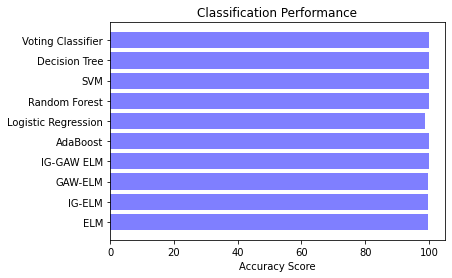

In [101]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

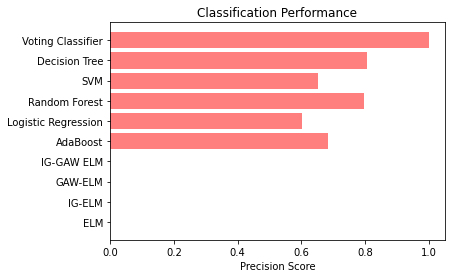

In [102]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

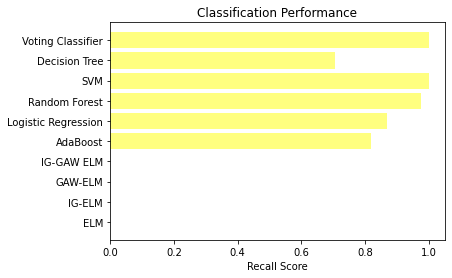

In [103]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

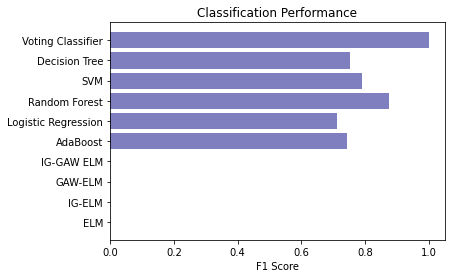

In [104]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# G-Mean

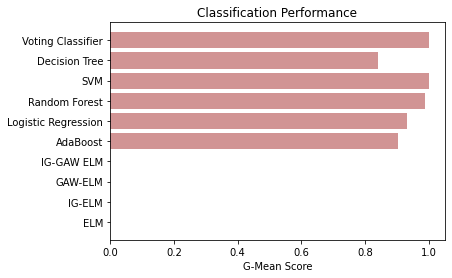

In [105]:
plt2.barh(y_pos, gmean, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('G-Mean Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

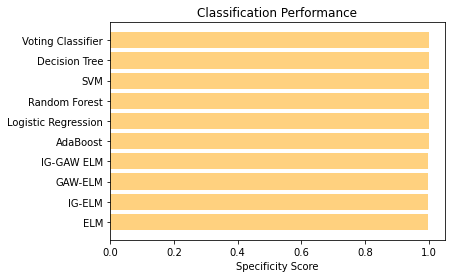

In [106]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity Score')
plt2.title('Classification Performance')
plt2.show()